# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Valores nulos por columna:
Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64

Estadísticas descriptivas:
              Price          Year        Mileage
count  10495.000000  10495.000000   10495.000000
mean   14538.403716   2013.553883   52509.430395
std     3922.420961      3.116585   36791.736601
min     5002.000000   1998.000000       5.000000
25%    11999.000000   2012.000000   26461.000000
50%    15000.000000   2014.000000   41680.000000
75%    16999.000000   2016.000000   71355.500000
max    32444.000000   2018.000000  232658.000000


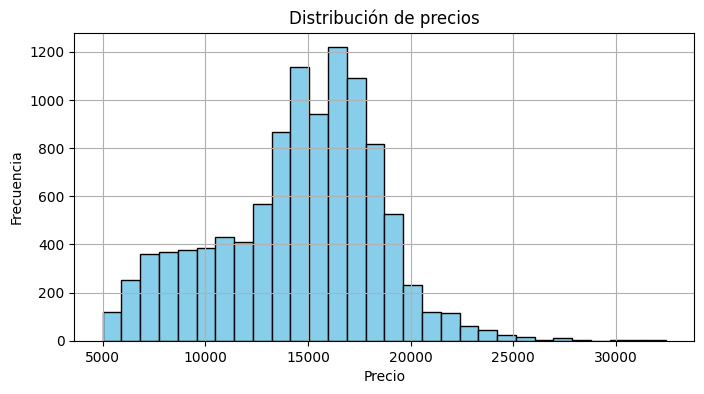

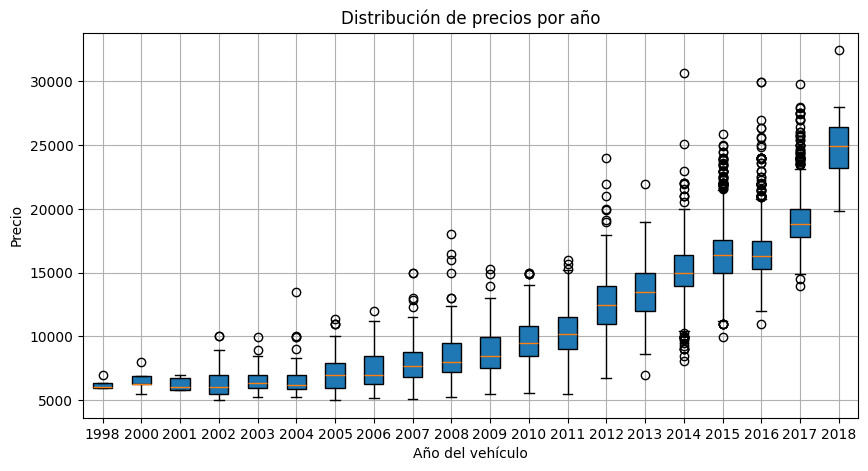

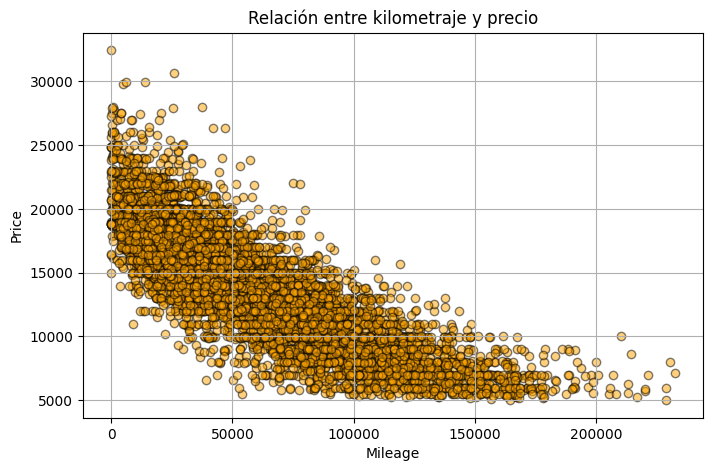

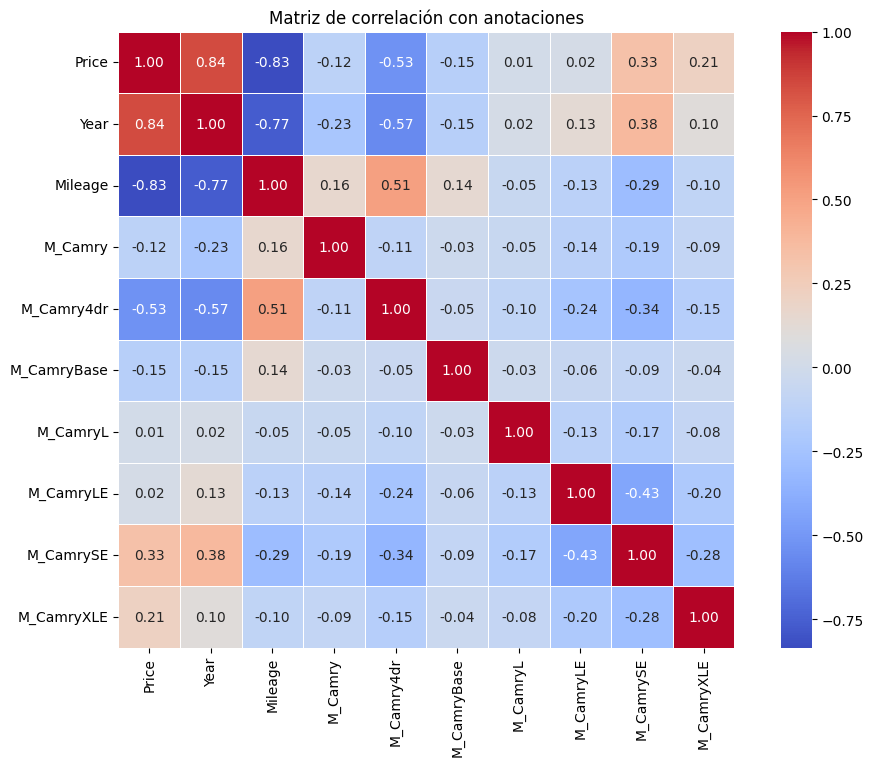

In [22]:
print("Valores nulos por columna:")
print(data.isnull().sum())

print("\nEstadísticas descriptivas:")
print(data.describe())

plt.figure(figsize=(8, 4))
plt.hist(data['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot([data[data['Year'] == year]['Price'] for year in sorted(data['Year'].unique())],
            labels=sorted(data['Year'].unique()), patch_artist=True)
plt.title('Distribución de precios por año')
plt.xlabel('Año del vehículo')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(data['Mileage'], data['Price'], alpha=0.5, color='orange', edgecolor='k')
plt.title('Relación entre kilometraje y precio')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

import seaborn as sns

plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matriz de correlación con anotaciones')
plt.show()


### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [23]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nDesempeño del modelo base:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)



Desempeño del modelo base:
MAE: 1314.4207078056425
RMSE: 1765.4118259983413
R²: 0.7962441677396794


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [24]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Mejores hiperparámetros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [25]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("\nDesempeño del modelo ajustado:")
print("MAE:", mae_best)
print("RMSE:", rmse_best)
print("R²:", r2_best)



Desempeño del modelo ajustado:
MAE: 1147.2014922680428
RMSE: 1564.2461359342767
R²: 0.8400338223938825


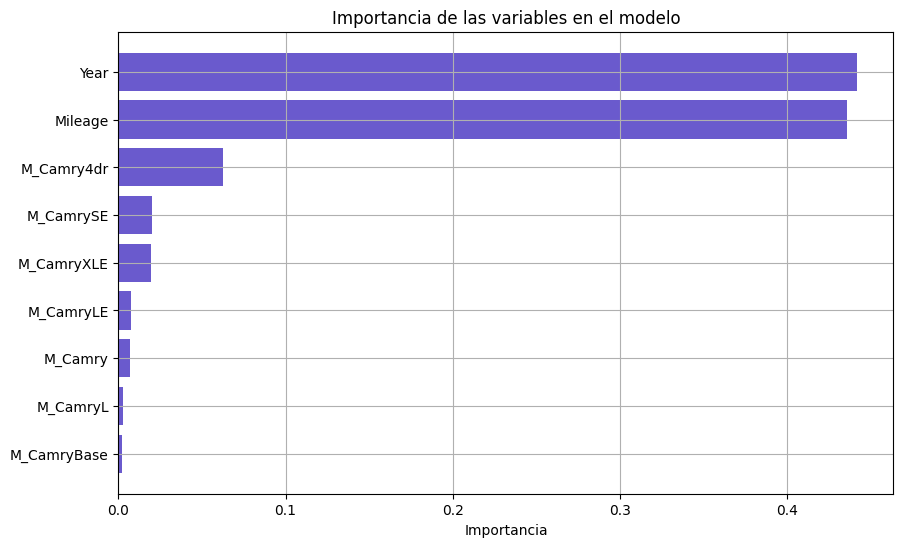


Ranking de importancia de variables:
       Feature  Importance
0         Year    0.441741
1      Mileage    0.436240
3   M_Camry4dr    0.062832
7    M_CamrySE    0.020267
8   M_CamryXLE    0.019286
6    M_CamryLE    0.007529
2      M_Camry    0.007160
5     M_CamryL    0.002928
4  M_CamryBase    0.002018


In [26]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'], color='slateblue')
plt.xlabel('Importancia')
plt.title('Importancia de las variables en el modelo')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("\nRanking de importancia de variables:")
print(importances)


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

Accuracy-like (<$1000 error): 0.5519630484988453


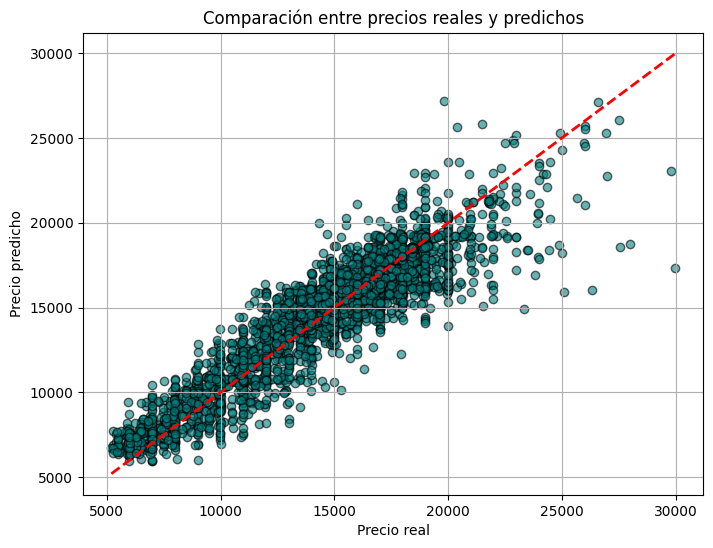

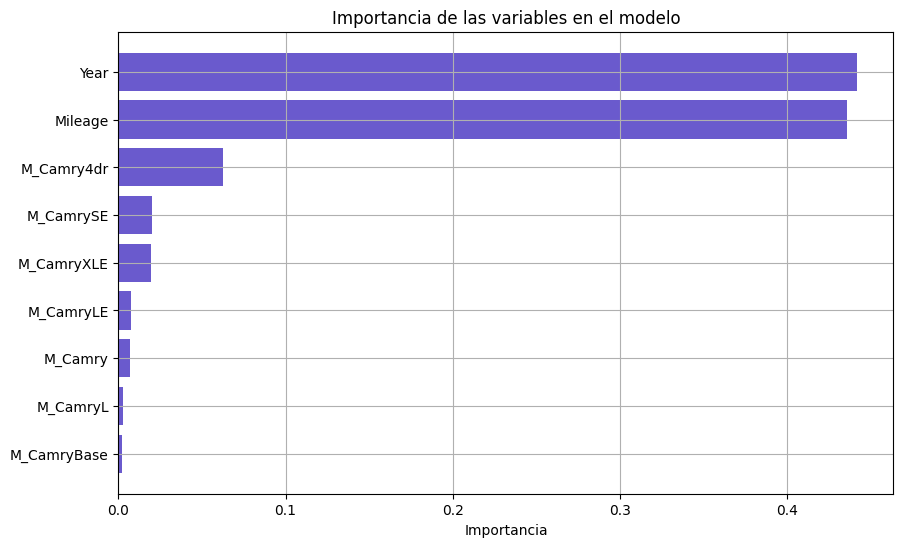


Conclusiones:
- El modelo Random Forest ajustado logró un desempeño sólido con un R² de 0.84, lo que indica que explica el 84% de la variabilidad en los precios.
- El MAE de 1,147 sugiere que, en promedio, el modelo se equivoca por poco más de mil pesos en cada predicción.
- El RMSE de 1,564 refleja que los errores más grandes están bien controlados, sin desviaciones extremas.
- El gráfico de dispersión muestra una buena alineación entre los precios reales y los predichos, especialmente en rangos medios.
- Las variables más influyentes fueron el año del vehículo, el kilometraje y el tipo de modelo Camry, lo cual es coherente con el comportamiento del mercado.
- Este modelo puede ser útil para estimar precios de vehículos en plataformas de venta, concesionarios o sistemas de valoración automática.


In [27]:
accuracy_like = accuracy_score((abs(y_test - y_pred_best) < 1000), [True]*len(y_test))
print("Accuracy-like (<$1000 error):", accuracy_like)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación entre precios reales y predichos')
plt.grid(True)
plt.show()

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'], color='slateblue')
plt.xlabel('Importancia')
plt.title('Importancia de las variables en el modelo')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

print("\nConclusiones:")
print("- El modelo Random Forest ajustado logró un desempeño sólido con un R² de 0.84, lo que indica que explica el 84% de la variabilidad en los precios.")
print("- El MAE de 1,147 sugiere que, en promedio, el modelo se equivoca por poco más de mil pesos en cada predicción.")
print("- El RMSE de 1,564 refleja que los errores más grandes están bien controlados, sin desviaciones extremas.")
print("- El gráfico de dispersión muestra una buena alineación entre los precios reales y los predichos, especialmente en rangos medios.")
print("- Las variables más influyentes fueron el año del vehículo, el kilometraje y el tipo de modelo Camry, lo cual es coherente con el comportamiento del mercado.")
print("- Este modelo puede ser útil para estimar precios de vehículos en plataformas de venta, concesionarios o sistemas de valoración automática.")


NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.